In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

## Load MNIST data

MNIST 数据集(Mixed National Institute of Standards and Technology database) 是美国国家标准与技术研究院收集整理的大型手写数字数据库，包含 60,000 个示例的训练集以及 10,000 个示例的测试集。

![image.png](attachment:image.png)

In [2]:
# MNIST 是非常基础的 ML 数据集，Keras 中有已经帮我们处理好的 MNIST
from keras.datasets import mnist

# 我们可以直接从 Keras 中加载已经处理好的 MNIST 数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 检查 training data 和 test data 中 feature 和 label 的数量
# 在这个 task 中，我们有 28x28 个 feature，表示的是每张图片（大小为 28x28）
# 中每个 pixel 里的数据（灰度，数字越大颜色越浅，0 表示黑色，255 表示白色）
print(f"Training features: {x_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Testing features: {x_test.shape}")
print(f"Testing labels: {y_test.shape}")

Training features: (60000, 28, 28)
Training labels: (60000,)
Testing features: (10000, 28, 28)
Testing labels: (10000,)


每一个 entry 是一张图片，图片用 numpy array 存储。每张图片是 28 * 28 的大小，每个值表示的是该坐标上的灰度值（0 为黑色，255 为白色）

In [3]:
# 把 numpy 显示时的最大行宽调大，保证同一行的数据在屏幕的一行里全部显示出来
np.set_printoptions(linewidth=150)
# 随便显示一个 entry 给大家一个 input data 样子的概念
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

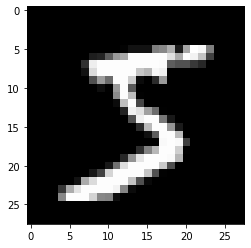

In [4]:
# 用图像的方式来显示数据会更直观
# imshow 表示将某个矩阵转成图片，矩阵中的数字表示颜色的深浅
# cmap=gray 指的是上色方案是灰度方案
plt.imshow(x_train[0], cmap='gray') # training 里的第0个数字
# 显示图像
plt.show()

Label 是正确的数字是几

In [5]:
# 显示这个 sample 所对应的 label
print(y_train[0])

5


# 用 Keras 建立一个 Feed-forward Model

In [6]:
# 基本上平时会用到的 model 都是一个有顺序的模型，所以用 Sequential
# 现在这个 model 是一个空的模型，需要我们往里面添加各个 layer
model = keras.models.Sequential() #只会从1-2层 2-3层...这个顺序走

# 往 Model 中添加 layer

Keras 支持多种不同的 layer
+ fully-connected basic layer.

```
keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```

+ Activation: Applies an activation function to an output.

```
keras.layers.Activation(activation)
```

+ Activation: Applies an activation function to an output.

```
keras.layers.Activation(activation)
```

+ Flatten: Flattens the input. #把所有数据变成vector不管几维度

```
keras.layers.Flatten(data_format=None)
```

+ Reshape: Reshapes an output to a certain shape. #相反于faltten

```
keras.layers.Reshape(target_shape)
```

+ And more ...

In [7]:
# 第一层一定要记得写 input_shape 这个 argument，表示的是我们的 input data 是什么样子的
# name 只是给人类看的，便于标记的一个名字
# 现在这个模型共有 2 个 hidden layer 和一个 output layer
model.add(keras.layers.Flatten(input_shape=x_train[0].shape, name='Flat_input'))
model.add(keras.layers.Dense(50, activation='relu', name='Hidden_1')) ### 要学的东西不复杂：浅 activation fn只有一种两种 较少 training难度小
model.add(keras.layers.Dense(50, activation='relu', name='Hidden_2'))

### model.add(keras.layers.Dense(20, activation='relu', name='Hidden_1')) ###加多层数：深 反之 越容易学习比较复杂的逻辑关系 看自己选
### model.add(keras.layers.Dense(20, activation='relu', name='Hidden_2')) ### 一定要控制好最后的parameter的数量
### model.add(keras.layers.Dense(20, activation='relu', name='Hidden_3'))
### model.add(keras.layers.Dense(20, activation='relu', name='Hidden_4'))
### model.add(keras.layers.Dense(20, activation='relu', name='Hidden_5'))

model.add(keras.layers.Dense(10, activation='softmax', name='Output')) #写在最后最后一层

In [8]:
# 在屏幕上输出现在我们的模型的结构
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flat_input (Flatten)         (None, 784)               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 50)                39250     
_________________________________________________________________
Hidden_2 (Dense)             (None, 50)                2550      
_________________________________________________________________
Output (Dense)               (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [9]:
# 将已经设计好的模型进行 compile，compile 之后模型就不能改变了
# 我们需要告诉模型我们用什么方法进行 weight update，以及如何衡量模型好坏
model.compile(optimizer='rmsprop', # Algorithm for weight update ##第一种不好换adam(是一种算法)
              loss='categorical_crossentropy', # Evaluation metric ## classification一定用这个 regression替换成 'mse'
              metrics=['accuracy'])  # Evaluation metric for human only

### Preprocess the data

In [10]:
from keras.utils import to_categorical

# 将我们的 label 变成 one-hot encoding
# 比如说我们的 label 一定是 4 种数据之一，那么
# 0 -> [1, 0, 0, 0]
# 1 -> [0, 1, 0, 0]
# 2 -> [0, 0, 1, 0]
# 3 -> [0, 0, 0, 1]
# [0, 2] -> [1, 0, 1, 0] ...
# 这样做的目的是方便我们的 model 进行 categorical prediction
# 最终模型可以对各个 input 给出该 input 应该归为每个 label 的可能性
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Fit data

In [11]:
# 这个叫做 callbacks，指的是在模型进行 training 的时候，额外需要考虑的东西
# 在这里我们增加一个可以让模型提前停止 training 的 callback -> EarlyStopping
# 加这个 callback 可以让我们的模型在发现自己无法进一步减小 loss 的时候，
# 自行停止训练（反正也没法变的更好了，就不浪费时间了）
# monitor 表示我们希望监视哪个 metric 的变化
# 模型的 metric 要至少减小 min_delta 这么多才算是有学到新的东西
# patience 指的是当模型没有学习到的时候，要不要多等一会儿看看是不是只是
# 运气不好导致的这次模型没有提升，如果连续 patience 这么多次都没学到新的东西就停
# restore_best_weights 表示当我们提前停下来的时候，是不是使用 loss 最低的那次
# 的 weight 作为最终结果

# 如果报错请把 acc 改成 accuracy，后面同理（keras 版本问题）
early_stop = keras.callbacks.EarlyStopping(monitor='acc',
                                           min_delta=0.02, 
                                           patience=2,
                                           restore_best_weights=True)
# Train model
# validation_data 只用来计算 metrics 的最终 score，不会用于 training
# 这个 function 在对模型进行 training 的同时还会 return 所有的 metrics
history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=50, 
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 2.2542 - accuracy: 0.8048 - val_loss: 0.6269 - val_accuracy: 0.8738
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 0.4009 - accuracy: 0.9118 - val_loss: 0.3947 - val_accuracy: 0.9049
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2699 - accuracy: 0.9358 - val_loss: 0.3055 - val_accuracy: 0.9354
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2161 - accuracy: 0.9460 - val_loss: 0.2290 - val_accuracy: 0.9491
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1817 - accuracy: 0.9550 - val_loss: 0.2471 - val_accuracy: 0.9502
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1641 - accuracy: 0.9589 - val_loss: 0.2215 - val_accuracy: 0.9562
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1522 - accuracy: 0.9628 - val_loss: 0.2401 - val_accuracy: 0.9482
Epoch 

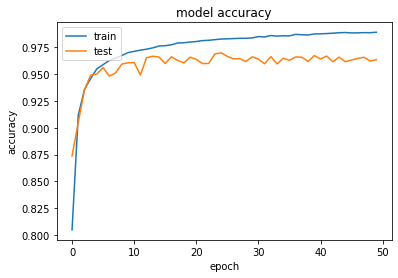

In [14]:
# 将 Training 过程中 training data accuracy 的变化 plot 出来
plt.plot(history.history['accuracy'])
# 将 Training 过程中 validation data accuracy 的变化 plot 出来
plt.plot(history.history['val_accuracy'])
# 给图片添加一个标题
plt.title('model accuracy')
# 给 x y 轴起一个名字
plt.ylabel('accuracy')
plt.xlabel('epoch')
# 将图例显示在左上角
plt.legend(['train', 'test'], loc='upper left')
# 显示图片
plt.show()

### Evaluate the model

In [15]:
# 利用我们的 test data set 进行测试
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.9635
Test score: 0.5200732350349426
Test accuracy: 0.9635000228881836


In [16]:
# argmax 之前是我们用模型对 test input data 进行测试
# argmax 是把 one-hot encoded 的结果变成实际的数字
# argmax([0.2, 0.4, 2.3, 1.2]) -> 2，因为 2.3 最大
y_pred = model.predict(x_test).argmax(axis=1)

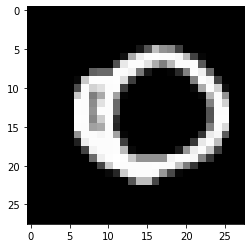

Prediction: 0, Actual: 0


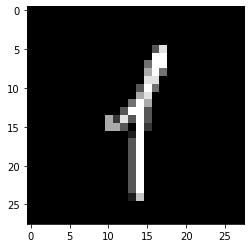

Prediction: 1, Actual: 1


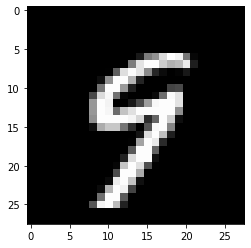

Prediction: 9, Actual: 9


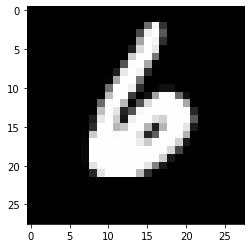

Prediction: 6, Actual: 6


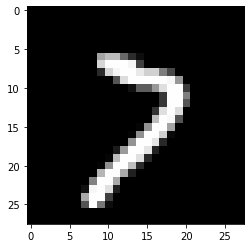

Prediction: 7, Actual: 7


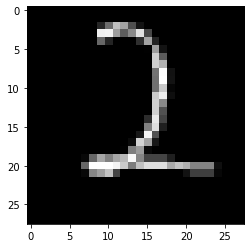

Prediction: 2, Actual: 2


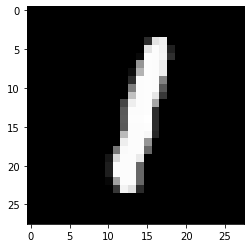

Prediction: 1, Actual: 1


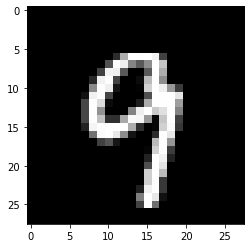

Prediction: 9, Actual: 9


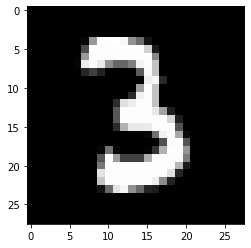

Prediction: 3, Actual: 3


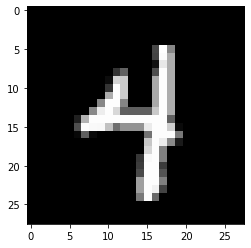

Prediction: 4, Actual: 4


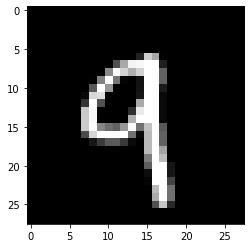

Prediction: 9, Actual: 9


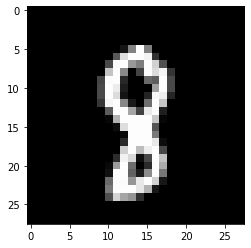

Prediction: 8, Actual: 8


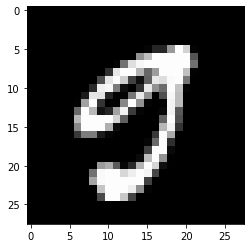

Prediction: 9, Actual: 9


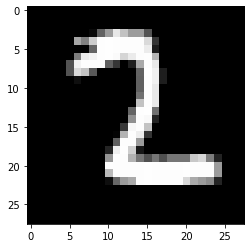

Prediction: 2, Actual: 2


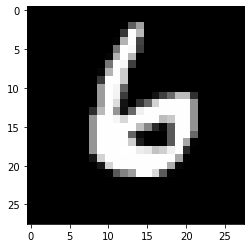

Prediction: 6, Actual: 6


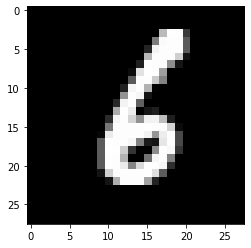

Prediction: 6, Actual: 6


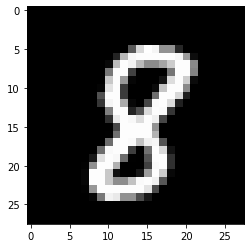

Prediction: 8, Actual: 8


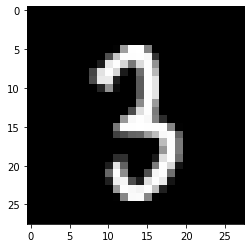

Prediction: 3, Actual: 3


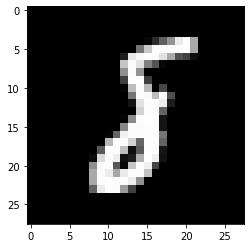

Prediction: 8, Actual: 8


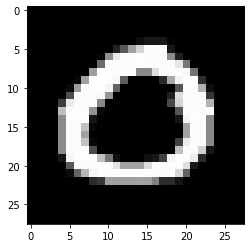

Prediction: 0, Actual: 0


In [17]:
# 随机取出 20 个 test image，查看实际手写数字和预测手写数字
for _ in range(20):
    # 随机取一个 test input 的位置
    choose = np.random.randint(x_test.shape[0])
    # 将这个 test input 的图片显示出来
    plt.imshow(x_test[choose], cmap='gray')
    plt.show()
    # 将预测值和实际值显示出来
    print(f"Prediction: {y_pred[choose]}, Actual: {y_test[choose].argmax()}")